In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LogisticRegression import *

In [2]:
csv = np.genfromtxt("e3.csv", delimiter=',', skip_header=0, dtype=float)
np.random.shuffle(csv)
train_len = int(csv.shape[0]*0.8)
train_csv = csv[:train_len]
val_csv = csv[train_len:]

t_data = train_csv[:,:-1]
t_label = np.array(train_csv[:,-1]).reshape(len(t_data),1)

v_data = val_csv[:,:-1]
v_label = np.array(val_csv[:,-1]).reshape(len(v_data),1)

In [15]:
lr = LogisticRegression(t_data,t_label,'sigmoid',2)
lr.train(0.1,10000)
score = lr.score(v_data,v_label)
print(f"score:{score}")

score:1.0


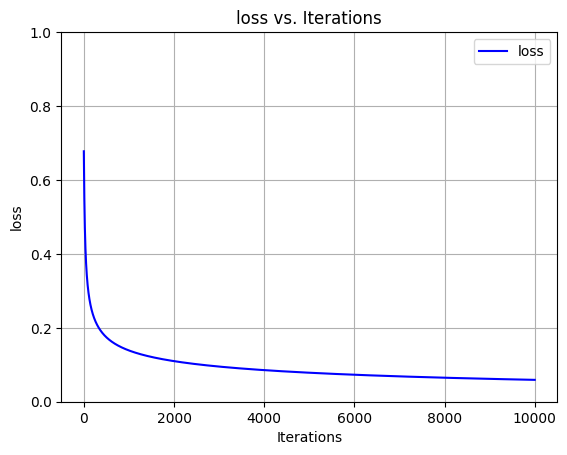

In [16]:
plt.plot(range(len(lr.loss)), lr.loss, label='loss', color='blue')
plt.title('loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.legend()
plt.ylim(0,1)
plt.grid(True) 
plt.show()


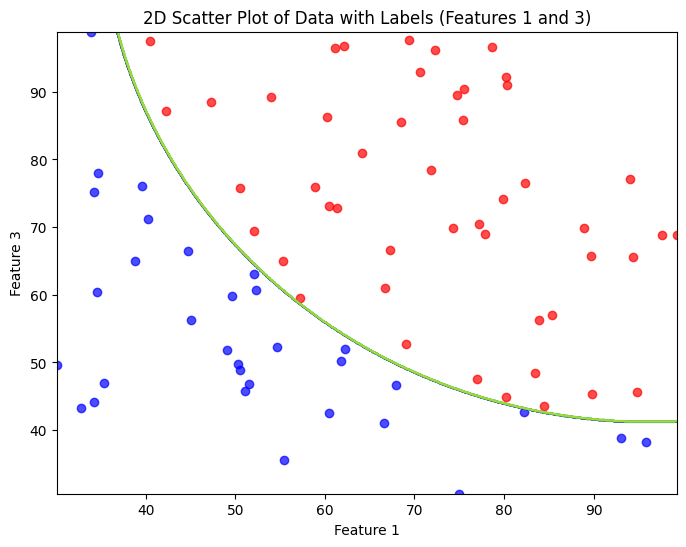

In [17]:
plt.figure(figsize=(8, 6))

samples = 800
x_min = np.min(t_data[:, 0])
x_max = np.max(t_data[:, 0])
y_min = np.min(t_data[:, 1])
y_max = np.max(t_data[:, 1])

X, Y = np.meshgrid(np.linspace(x_min, x_max, samples), np.linspace(y_min, y_max, samples))

data = np.c_[X.ravel(), Y.ravel()] 
Z = lr.predict(data).argmax(axis=1).reshape(samples, samples)

plt.contour(X, Y, Z)

colors = ['blue', 'red']
for i in range(t_data.shape[0]):
    plt.scatter(t_data[i, 0], t_data[i, 1], color=colors[int(t_label[i])], alpha=0.7)

plt.title('2D Scatter Plot of Data with Labels (Features 1 and 3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.show()



In [18]:
lr.save_model("e3.npz")

In [3]:
lr = LogisticRegression(None,None)
lr.load_model("e3.npz")